#### Data Cleaning
##### Missing Value Imputation using scikit-learn
###### Different Strategy for different variables (Numerical and Categorical) with Scikit-learn

### Importing necessary Libraries

In [87]:
import numpy as np
import pandas as pd 

from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

import matplotlib.pyplot as plt
import seaborn as sns

In [88]:
#  Loading datasets 

train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

print("Shape of train dataframe: ", train_df.shape)
print("Shape of test dataframe: ", test_df.shape)

Shape of train dataframe:  (1460, 81)
Shape of test dataframe:  (1459, 80)


In [89]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [90]:
train_df.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [91]:
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [92]:
X_train = train_df.drop(columns="SalePrice", axis=1)
y_train = train_df["SalePrice"]
X_test = test_df.copy()


print("Shape of X_train: ", X_train.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of X_test: ", X_test.shape)

Shape of X_train:  (1460, 80)
Shape of y_train:  (1460,)
Shape of X_test:  (1459, 80)


### Missing Value Imputation

In [93]:
isnull_sum = X_train.isnull().sum()
print(isnull_sum)

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
Length: 80, dtype: int64


In [94]:
# Finding the numerical variables with missing values
num_vars = X_train.select_dtypes(include=["int64", "float64"]).columns
num_vars_miss = [var for var in num_vars if isnull_sum[var] > 0]

In [95]:
print(num_vars_miss)

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']


In [96]:
# Finding the categorical variables with missing values
categ_vars = X_train.select_dtypes(include=["O"]).columns
categ_vars_miss = [var for var in categ_vars if isnull_sum[var] > 0]
print(categ_vars_miss)


['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


In [97]:
num_var_mean = ['LotFrontage']
num_var_median = ['MasVnrArea', 'GarageYrBlt']

In [98]:
categ_vars_mode = ['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 
                   'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType']
categ_vars_missing = ['GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


#  Creating Pipeline

In [99]:
num_var_mean_imputer = Pipeline(steps=[("imputer", SimpleImputer(strategy="mean"))])
num_var_median_imputer = Pipeline(steps=[("imputer", SimpleImputer(strategy="median"))])

In [100]:
categ_vars_mode_imputer = Pipeline(steps=[("imputer", SimpleImputer(strategy="most_frequent"))])
categ_vars_missing_imputer = Pipeline(steps=[("imputer", SimpleImputer(strategy="constant", fill_value="missing"))])


In [101]:
# Creating the ColumnTransformer
transformer = ColumnTransformer(transformers=[
    ("mean_imputer", num_var_mean_imputer, num_var_mean),
    ("median_imputer", num_var_median_imputer, num_var_median),
    ("mode_imputer", categ_vars_mode_imputer, categ_vars_mode),
    ("missing_imputer", categ_vars_missing_imputer, categ_vars_missing)
])

transformer


ColumnTransformer(transformers=[('mean_imputer',
                                 Pipeline(steps=[('imputer', SimpleImputer())]),
                                 ['LotFrontage']),
                                ('median_imputer',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median'))]),
                                 ['MasVnrArea', 'GarageYrBlt']),
                                ('mode_imputer',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent'))]),
                                 ['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond',
                                  'BsmtExposure', 'BsmtFinType1',
                                  'BsmtFinType2', 'Electrical', 'FireplaceQu',
                                  'GarageType']),
                                ('missing_imputer',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='constant'))]),
                                 ['GarageFinish', 'GarageQual', 'GarageCond',
                                  'PoolQC', 'Fence', 'MiscFeature'])])

In [102]:
transformer.fit(X_train)

ColumnTransformer(transformers=[('mean_imputer',
                                 Pipeline(steps=[('imputer', SimpleImputer())]),
                                 ['LotFrontage']),
                                ('median_imputer',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median'))]),
                                 ['MasVnrArea', 'GarageYrBlt']),
                                ('mode_imputer',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent'))]),
                                 ['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond',
                                  'BsmtExposure', 'BsmtFinType1',
                                  'BsmtFinType2', 'Electrical', 'FireplaceQu',
                                  'GarageType']),
                                ('missing_imputer',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='constant'))]),
                                 ['GarageFinish', 'GarageQual', 'GarageCond',
                                  'PoolQC', 'Fence', 'MiscFeature'])])

In [103]:
transformer.transform

<bound method ColumnTransformer.transform of ColumnTransformer(transformers=[('mean_imputer',
                                 Pipeline(steps=[('imputer', SimpleImputer())]),
                                 ['LotFrontage']),
                                ('median_imputer',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median'))]),
                                 ['MasVnrArea', 'GarageYrBlt']),
                                ('mode_imputer',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent'))]),
                                 ['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond',
                                  'BsmtExposure', 'BsmtFinType1',
                                  'BsmtFinType2', 'Electrical', 'FireplaceQu',
                                  'GarageType']),
                              

In [104]:
transformer.named_transformers_["mean_imputer"].named_steps["imputer"].statistics_

array([70.04995837])

In [105]:
train_df["LotFrontage"].mean()

70.04995836802665

In [106]:
transformer.named_transformers_["mode_imputer"].named_steps["imputer"].statistics_

array(['Grvl', 'BrkFace', 'TA', 'TA', 'No', 'Unf', 'Unf', 'SBrkr', 'Gd',
       'Attchd'], dtype=object)

In [107]:
X_train_clean = transformer.transform(X_train)
X_test_clean = transformer.transform(X_test)


In [108]:
transformer.transformers_   # remainder

[('mean_imputer',
  Pipeline(steps=[('imputer', SimpleImputer())]),
  ['LotFrontage']),
 ('median_imputer',
  Pipeline(steps=[('imputer', SimpleImputer(strategy='median'))]),
  ['MasVnrArea', 'GarageYrBlt']),
 ('mode_imputer',
  Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent'))]),
  ['Alley',
   'MasVnrType',
   'BsmtQual',
   'BsmtCond',
   'BsmtExposure',
   'BsmtFinType1',
   'BsmtFinType2',
   'Electrical',
   'FireplaceQu',
   'GarageType']),
 ('missing_imputer',
  Pipeline(steps=[('imputer',
                   SimpleImputer(fill_value='missing', strategy='constant'))]),
  ['GarageFinish',
   'GarageQual',
   'GarageCond',
   'PoolQC',
   'Fence',
   'MiscFeature']),
 ('remainder',
  'drop',
  [0, 1, 2, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 27, 28, 29, 34, 36, 37, 38, 39, 40, 41, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 61, 62, 65, 66, 67, 68, 69, 70, 71, 75, 76, 77, 78, 79])]

In [109]:
X_train_clean_miss_var = pd.DataFrame(X_train_clean, columns= num_var_mean+num_var_median+categ_vars_mode+categ_vars_missing)
X_train_clean_miss_var

,LotFrontage,MasVnrArea,GarageYrBlt,Alley,MasVnrType,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature
0,65.0,196.0,2003.0,Grvl,BrkFace,Gd,TA,No,GLQ,Unf,SBrkr,Gd,Attchd,RFn,TA,TA,missing,missing,missing
1,80.0,0.0,1976.0,Grvl,BrkFace,Gd,TA,Gd,ALQ,Unf,SBrkr,TA,Attchd,RFn,TA,TA,missing,missing,missing
2,68.0,162.0,2001.0,Grvl,BrkFace,Gd,TA,Mn,GLQ,Unf,SBrkr,TA,Attchd,RFn,TA,TA,missing,missing,missing
3,60.0,0.0,1998.0,Grvl,BrkFace,TA,Gd,No,ALQ,Unf,SBrkr,Gd,Detchd,Unf,TA,TA,missing,missing,missing
4,84.0,350.0,2000.0,Grvl,BrkFace,Gd,TA,Av,GLQ,Unf,SBrkr,TA,Attchd,RFn,TA,TA,missing,missing,missing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,0.0,1999.0,Grvl,BrkFace,Gd,TA,No,Unf,Unf,SBrkr,TA,Attchd,RFn,TA,TA,missing,missing,missing
1456,85.0,119.0,1978.0,Grvl,Stone,Gd,TA,No,ALQ,Rec,SBrkr,TA,Attchd,Unf,TA,TA,missing,MnPrv,missing
1457,66.0,0.0,1941.0,Grvl,BrkFace,TA,Gd,No,GLQ,Unf,SBrkr,Gd,Attchd,RFn,TA,TA,missing,GdPrv,Shed
1458,68.0,0.0,1950.0,Grvl,BrkFace,TA,TA,Mn,GLQ,Rec,FuseA,Gd,Attchd,Unf,TA,TA,missing,missing,missing


In [110]:
X_train_clean_miss_var.isnull().sum()

LotFrontage     0
MasVnrArea      0
GarageYrBlt     0
Alley           0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
Electrical      0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

In [111]:
train_df["Alley"].value_counts()

Alley
Grvl    50
Pave    41
Name: count, dtype: int64

In [112]:
X_train_clean_miss_var["Alley"].value_counts()

Alley
Grvl    1419
Pave      41
Name: count, dtype: int64

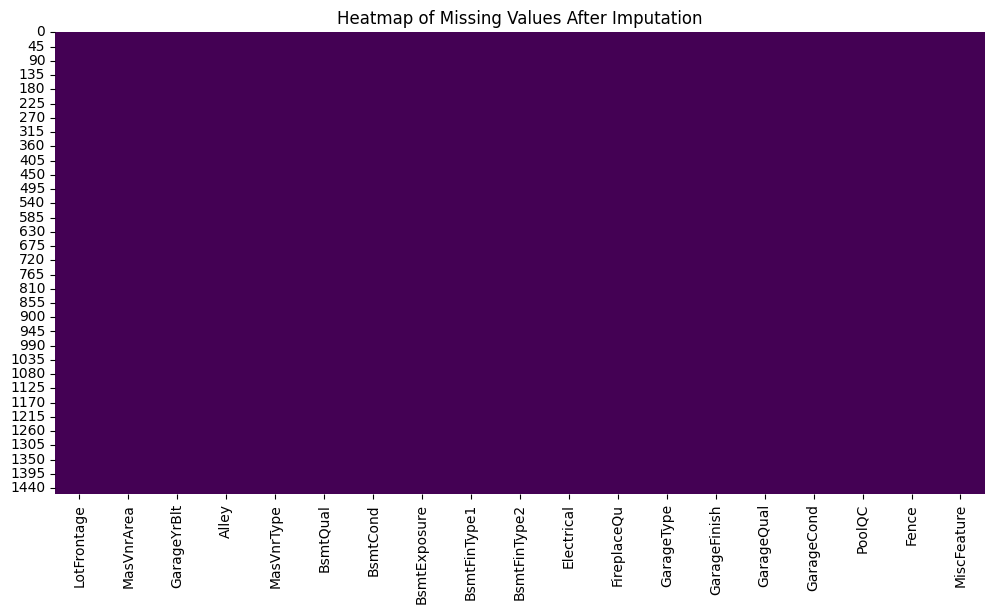

In [116]:
#  Heatmap of Missing Values 
plt.figure(figsize=(12, 6))
sns.heatmap(X_train_clean_miss_var.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values After Imputation')
plt.show()

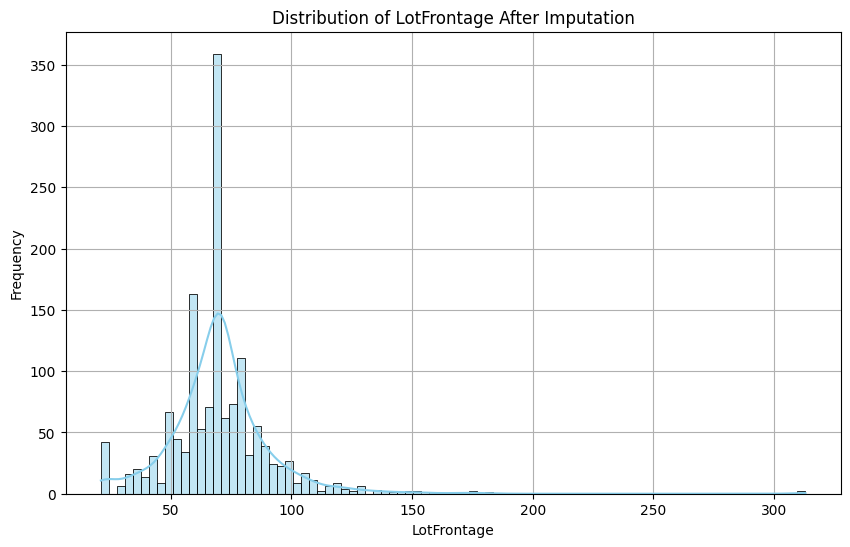

In [117]:
 # Distribution of a Numerical Feature (`LotFrontage`)
plt.figure(figsize=(10, 6))
sns.histplot(X_train_clean_miss_var['LotFrontage'], kde=True, color='skyblue')
plt.title('Distribution of LotFrontage After Imputation')
plt.xlabel('LotFrontage')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

C:\Users\biraj\AppData\Local\Temp\ipykernel_13084\990391765.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=X_train_clean_miss_var['Alley'], palette='Set2')


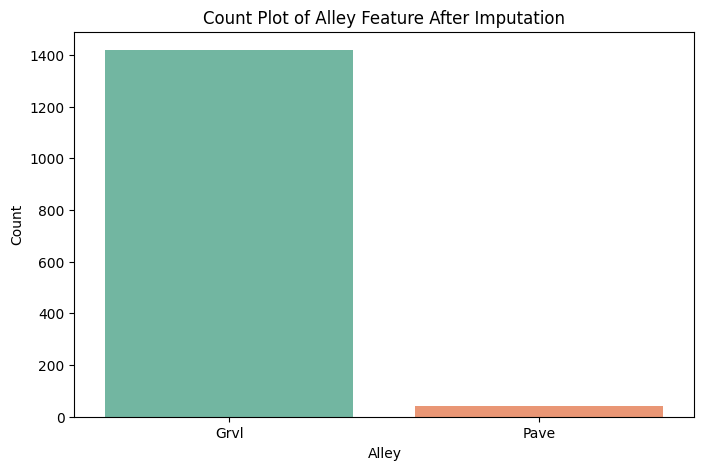

In [118]:
# Count Plot of a Categorical Feature (`Alley`)
plt.figure(figsize=(8, 5))
sns.countplot(x=X_train_clean_miss_var['Alley'], palette='Set2')
plt.title('Count Plot of Alley Feature After Imputation')
plt.xlabel('Alley')
plt.ylabel('Count')
plt.show()